## **Covid Vaccine in the United States**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px

**Data set From kaggle that shows numbers of vaccinated people per states Day by day From 12/20/2020 through 05/25/2021**

https://www.kaggle.com/paultimothymooney/usa-covid19-vaccinations/code = Dataset

In [ ]:
data = pd.read_csv("us_state_vaccinations.csv")

In [ ]:
data

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,2021-05-21,Wyoming,385924.0,500415.0,208848.0,30.93,66.68,179026.0,36.09,86.46,1566.0,1355.0,2341.0,0.771
8729,2021-05-22,Wyoming,388011.0,501825.0,210083.0,31.12,67.04,180097.0,36.30,86.71,2087.0,1333.0,2303.0,0.773
8730,2021-05-23,Wyoming,388122.0,501825.0,210179.0,31.13,67.06,180182.0,36.32,86.71,111.0,1332.0,2301.0,0.773
8731,2021-05-24,Wyoming,388185.0,501825.0,210231.0,31.15,67.07,180262.0,36.32,86.71,63.0,1327.0,2293.0,0.774


**Data *Start* and *End* Date**

In [ ]:
data['date']=pd.to_datetime(data['date'])

#determine the date range
print("start date: ",data.date.min())
print("latest date: ",data.date.max())

start date:  2020-12-20 00:00:00
latest date:  2021-05-25 00:00:00


**Cleaning the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 8733 non-null   datetime64[ns]
 1   location                             8733 non-null   object        
 2   total_vaccinations                   8463 non-null   float64       
 3   total_distributed                    8323 non-null   float64       
 4   people_vaccinated                    8311 non-null   float64       
 5   people_fully_vaccinated_per_hundred  7809 non-null   float64       
 6   total_vaccinations_per_hundred       7911 non-null   float64       
 7   people_fully_vaccinated              8229 non-null   float64       
 8   people_vaccinated_per_hundred        7886 non-null   float64       
 9   distributed_per_hundred              7898 non-null   float64       
 10  daily_vaccin

**Getting Uniqe names in the Dataset for cleaning**

In [ ]:
data.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

**Adding Month to the Dataset**

In [ ]:
data['month'] = data.date.dt.month
data.month.unique()

array([ 1,  2,  3,  4,  5, 12])

**Adding Week to the Dataset**

In [ ]:
data['week'] = data.date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



**Switching States name to Abbreviated form**

In [ ]:
state_code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York State': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
data['State Code'] = data['location'].map(state_code)

In [ ]:
data['State Code']

0       AL
1       AL
2       AL
3       AL
4       AL
        ..
8728    WY
8729    WY
8730    WY
8731    WY
8732    WY
Name: State Code, Length: 8733, dtype: object

**Getting the monthly total of Vaccinated Population**

In [ ]:
data_month = data.groupby(['State Code','month']).daily_vaccinations.sum().reset_index()
data_month = data_month.sort_values(by=['month','State Code'])
data_month['month'] = data_month.month.replace(1,"January-2021")
data_month['month'] = data_month.month.replace(2,"February-2021")
data_month['month'] = data_month.month.replace(3,"March-2021")
data_month['month'] = data_month.month.replace(4,"April-2021")
data_month['month'] = data_month.month.replace(5,"May-2021")
data_month

,State Code,month,daily_vaccinations
0,AK,January-2021,82115.0
5,AL,January-2021,235312.0
10,AR,January-2021,321332.0
15,AZ,January-2021,402474.0
20,CA,January-2021,2201238.0
...,...,...,...
234,VT,May-2021,182321.0
239,WA,May-2021,1557870.0
244,WI,May-2021,782864.0
249,WV,May-2021,131967.0


**Weekly Vaccination Total**

**Total Vaccination week by week**

In [ ]:
data_week = data.groupby(['State Code','week']).daily_vaccinations.sum().reset_index()
data_week = data_week.sort_values(by=['week','State Code'])
data_week

,State Code,week,daily_vaccinations
0,AK,2,19371.0
20,AL,2,35474.0
40,AR,2,152270.0
60,AZ,2,84444.0
80,CA,2,418697.0
...,...,...,...
939,VT,21,17803.0
959,WA,21,128358.0
979,WI,21,52279.0
999,WV,21,10538.0


**Highest Daily vaccination rate**

In [ ]:
data_week.groupby(by=data_week["daily_vaccinations"]).max().tail()

,State Code,week
daily_vaccinations,,
2571433.0,CA,17
2625254.0,CA,12
2687784.0,CA,14
3037926.0,CA,15
3059963.0,CA,16


**Lowest Daily Vaccination rate**

In [ ]:
data_week.groupby(by=data_week["daily_vaccinations"]).min().head()

,State Code,week
daily_vaccinations,,
2706.0,WY,21
3435.0,ND,21
4152.0,AK,21
4315.0,SD,21
7281.0,MT,21


In [ ]:
dw = data_week.groupby([data_week['daily_vaccinations']]).sum()
dw

,week
daily_vaccinations,
2706.0,21
3435.0,21
4152.0,21
4315.0,21
7281.0,21
...,...
2571433.0,17
2625254.0,12
2687784.0,14


**Week by week Map chart of Covid Vaccination**


In [ ]:
fig2 = px.choropleth(data_week,locations=data_week['State Code'],color=data_week['daily_vaccinations'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',animation_frame=data_week['week'],
                     title="Vaccinations in the USA on weekly basis",labels={'daily_vaccinations':'Number of Vaccinations'})

fig2.show()

**Monthly Map chart of Covid Vaccination**

In [ ]:
fig1 = px.choropleth(data_month,locations=data_month['State Code'],color=data_month['daily_vaccinations'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',animation_frame=data_month['month'],
                     title="Vaccinations in the USA on monthly basis",labels={'daily_vaccinations':'Number of Vaccinations'})

fig1.show()

In [ ]:
wa = data.loc[data.location == 'Washington',:]
wa.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,month,week,State Code
8197,2021-01-12,Washington,195567.0,567725.0,162105.0,0.23,2.57,17689.0,2.13,7.46,NaN,NaN,NaN,0.344,1,2,WA
8198,2021-01-13,Washington,208238.0,572600.0,169650.0,0.30,2.73,22625.0,2.23,7.52,12671.0,12671.0,1664.0,0.364,1,2,WA
8199,2021-01-14,Washington,225238.0,655575.0,187450.0,NaN,2.96,NaN,2.46,8.61,17000.0,14836.0,1948.0,0.344,1,2,WA
8200,2021-01-15,Washington,242606.0,696175.0,200682.0,0.41,3.19,31581.0,2.64,9.14,17368.0,15680.0,2059.0,0.348,1,2,WA
8201,2021-01-16,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19648.5,16672.0,2189.0,NaN,1,2,WA


**Total People Vaccinated (One dose) and People Fully Vaccinated (Two doses)**

In [ ]:
data_vaccinated = data[(data.date == '2021-05-25')]
data_vaccinated = data_vaccinated[['people_vaccinated','people_fully_vaccinated','State Code']]
data_vaccinated = data_vaccinated.dropna(axis=0)

In [ ]:
data_vaccinated

,people_vaccinated,people_fully_vaccinated,State Code
133,1754294.0,1415771.0,AL
267,331563.0,283291.0,AK
535,3304861.0,2559836.0,AZ
669,1170081.0,915272.0,AR
937,21951901.0,16463950.0,CA
1071,3049389.0,2526489.0,CO
1205,2209618.0,1846899.0,CT
1339,517131.0,404308.0,DE
1607,395158.0,314050.0,DC
1875,10300783.0,8108043.0,FL


In [ ]:
data_vaccinated.sort_values(by="people_fully_vaccinated",ascending =False ).head()

,people_vaccinated,people_fully_vaccinated,State Code
937,21951901.0,16463950.0,CA
7369,12508198.0,9966234.0,TX
5493,10567466.0,8824107.0,NY
1875,10300783.0,8108043.0,FL
6431,7296700.0,5378692.0,PA


In [ ]:
df = data.loc[data.location == 'Washington',:]
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,month,week,State Code
8197,2021-01-12,Washington,195567.0,567725.0,162105.0,0.23,2.57,17689.0,2.13,7.46,NaN,NaN,NaN,0.344,1,2,WA
8198,2021-01-13,Washington,208238.0,572600.0,169650.0,0.30,2.73,22625.0,2.23,7.52,12671.0,12671.0,1664.0,0.364,1,2,WA
8199,2021-01-14,Washington,225238.0,655575.0,187450.0,NaN,2.96,NaN,2.46,8.61,17000.0,14836.0,1948.0,0.344,1,2,WA
8200,2021-01-15,Washington,242606.0,696175.0,200682.0,0.41,3.19,31581.0,2.64,9.14,17368.0,15680.0,2059.0,0.348,1,2,WA
8201,2021-01-16,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19648.5,16672.0,2189.0,NaN,1,2,WA


**ARIMA Model Steps**

In [ ]:
data1 = pd.read_csv("./state_vaccinations1.csv",engine = 'python', index_col = 'date')
data1.head()

,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


**Change DataFrame column location to State**

In [ ]:
data1 = data1.rename(columns ={'location':'State'})
data1.head()

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


**Drop row with empty value**

In [ ]:
data1.dropna(inplace = True)
wa1 = data1.loc[data1.State == 'Washington', : ]
wa1.head()

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-13,Washington,208238.0,572600.0,169650.0,0.30,2.73,22625.0,2.23,7.52,12671.0,12671.0,1664.0,0.364
2021-01-15,Washington,242606.0,696175.0,200682.0,0.41,3.19,31581.0,2.64,9.14,17368.0,15680.0,2059.0,0.348
2021-01-19,Washington,321200.0,696175.0,265507.0,0.59,4.22,45237.0,3.49,9.14,19648.5,17948.0,2357.0,0.461
2021-01-20,Washington,346765.0,805000.0,286500.0,0.65,4.55,49731.0,3.76,10.57,25565.0,19790.0,2599.0,0.431
2021-01-21,Washington,373423.0,820875.0,306942.0,0.73,4.90,55902.0,4.03,10.78,26658.0,21169.0,2780.0,0.455


**Create a method to plot a line graph**



In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value'):
  plt.figure(figsize=(16,5))
  plt.plot(x, y)
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.xticks(rotation=90)
  plt.show()

**Plot Washington State Vaccination Rate**

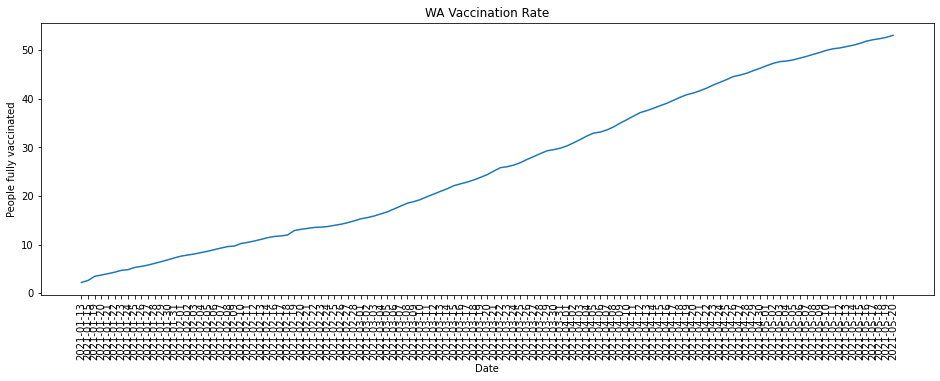

In [ ]:
plot_df(wa1, x = wa1.index, y =  wa1.people_vaccinated_per_hundred, title = "WA Vaccination Rate",ylabel= "People fully vaccinated")

In [ ]:
wa1.tail()

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-05-16,Washington,6813377.0,8316630.0,3949859.0,40.07,89.47,3051554.0,51.87,109.22,82122.0,63750.0,8372.0,0.819
2021-05-17,Washington,6871734.0,8316630.0,3972049.0,40.57,90.24,3089183.0,52.16,109.22,58357.0,59438.0,7805.0,0.826
2021-05-18,Washington,6910257.0,8380210.0,3988475.0,40.87,90.75,3112485.0,52.38,110.05,38523.0,58117.0,7632.0,0.825
2021-05-19,Washington,6961512.0,8399010.0,4010086.0,41.28,91.42,3143761.0,52.66,110.30,51255.0,59488.0,7812.0,0.829
2021-05-20,Washington,7029358.0,8463800.0,4040328.0,41.81,92.31,3183971.0,53.06,111.15,67846.0,60773.0,7981.0,0.831


In [ ]:
#slice the data by a third
wa1 = wa1.iloc[1::,:]
wa1

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-15,Washington,242606.0,696175.0,200682.0,0.41,3.19,31581.0,2.64,9.14,17368.0,15680.0,2059.0,0.348
2021-01-19,Washington,321200.0,696175.0,265507.0,0.59,4.22,45237.0,3.49,9.14,19648.5,17948.0,2357.0,0.461
2021-01-20,Washington,346765.0,805000.0,286500.0,0.65,4.55,49731.0,3.76,10.57,25565.0,19790.0,2599.0,0.431
2021-01-21,Washington,373423.0,820875.0,306942.0,0.73,4.90,55902.0,4.03,10.78,26658.0,21169.0,2780.0,0.455
2021-01-22,Washington,403135.0,829950.0,330357.0,0.82,5.29,62152.0,4.34,10.90,29712.0,22933.0,3012.0,0.486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,Washington,6813377.0,8316630.0,3949859.0,40.07,89.47,3051554.0,51.87,109.22,82122.0,63750.0,8372.0,0.819
2021-05-17,Washington,6871734.0,8316630.0,3972049.0,40.57,90.24,3089183.0,52.16,109.22,58357.0,59438.0,7805.0,0.826
2021-05-18,Washington,6910257.0,8380210.0,3988475.0,40.87,90.75,3112485.0,52.38,110.05,38523.0,58117.0,7632.0,0.825


**Calculating D for ARIMA, Differencing to make it stationary**

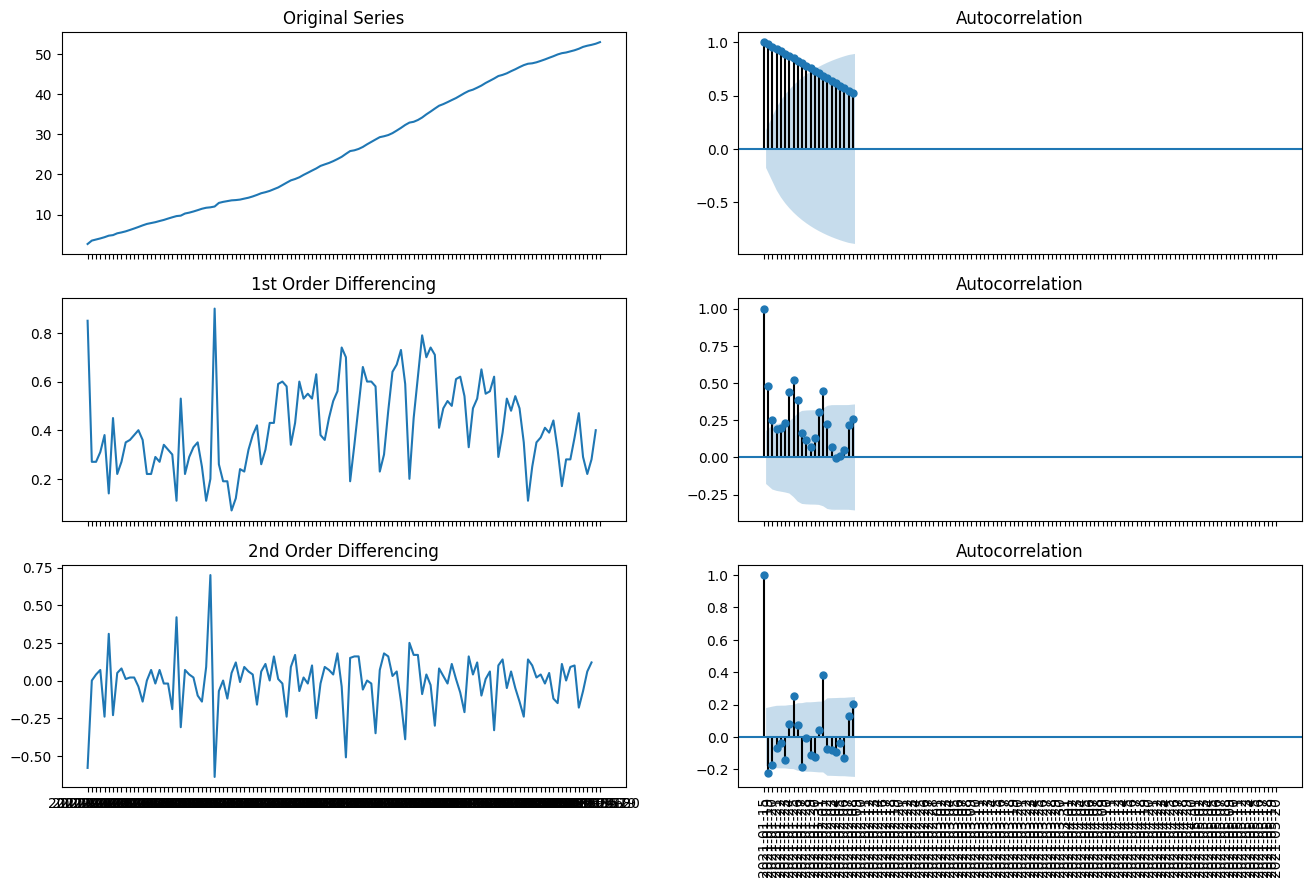

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(16,10), 'figure.dpi':100})

#Original Series 
fig, axes = plt.subplots(3,2, sharex= True)
axes[0,0].plot(wa1["people_vaccinated_per_hundred"]); axes[0,0].set_title('Original Series')
plot_acf(wa1["people_vaccinated_per_hundred"], ax = axes[0,1])

#1st Differencing 
axes[1,0].plot(np.diff(wa1["people_vaccinated_per_hundred"])); axes[1,0].set_title('1st Order Differencing')
plot_acf(np.diff(wa1["people_vaccinated_per_hundred"]), ax = axes[1,1])
diffval = np.diff(wa1["people_vaccinated_per_hundred"])


#2nd Differencing 
axes[2,0].plot(np.diff(diffval)); axes[2,0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax = axes[2,1])
plt.xticks(rotation = 90)
plt.show()


In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 9.5MB 39.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Using Auto ARIMA to calculate p,d,q

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
modelWA = pm.auto_arima(wa1['people_vaccinated_per_hundred'], start_p =1, start_q = 1, test = 'adf', max_p = 10, max_q = 10 , d = None, seasonal = False, start_P = 0, D= 0, trace = True, error_action = 'ignore', supress_warnings = True, stepwise = True)
print(modelWA.summary)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-99.228, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-75.955, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-80.753, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-102.020, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-77.899, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-108.747, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-106.752, Time=0.28 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-98.667, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-108.213, Time=0.54 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-110.706, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-103.966, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-108.711, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-108.716, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-108.940, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0]             : 

Plots from diagnostics

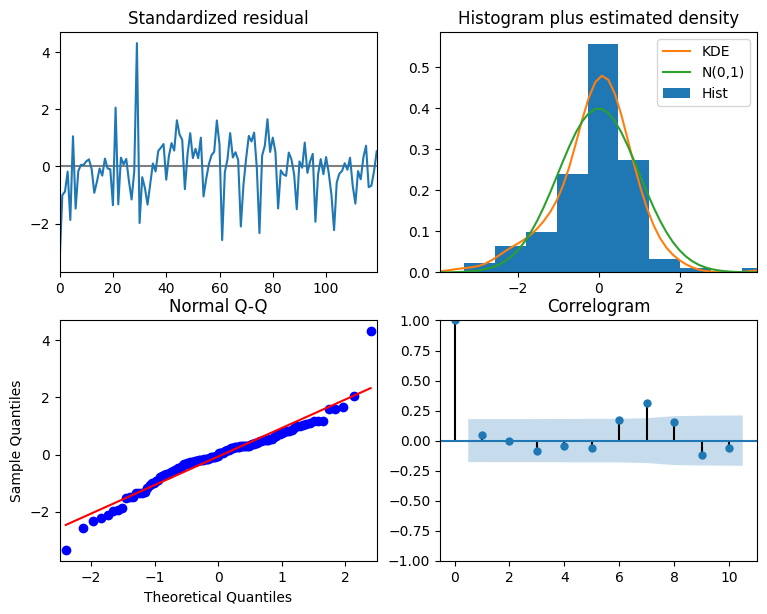

In [ ]:
modelWA.plot_diagnostics(figsize = (9,7))
plt.show()

**Forecast of Washington State in 50 days after May 20**

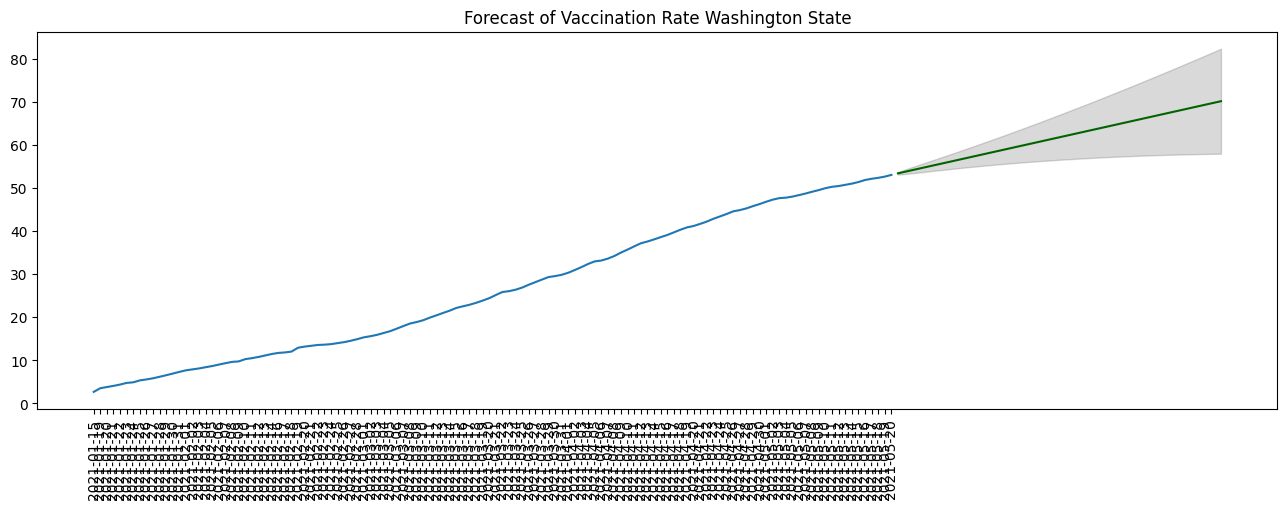

After 50 days, there will be  70.18702901345986 hundreds of people vaccinated in Washington State


In [ ]:
#Forecast
n_periods=50
fc, confint=modelWA.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc=np.arange(len(wa1["people_vaccinated_per_hundred"]),len(wa1["people_vaccinated_per_hundred"])+n_periods)

#make series for plotting purpose
fc_series=pd.Series(fc, index=index_of_fc)
lower_series=pd.Series(confint[:,0], index=index_of_fc)
upper_series=pd.Series(confint[:,1], index=index_of_fc)
#Plot
plt.figure(figsize=(16,5))
plt.plot(wa1["people_vaccinated_per_hundred"])
#plt.plot(df[""])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,lower_series, upper_series, color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate Washington State")
plt.xticks(rotation=90)
plt.show()
x =  fc_series.array
print("After " + str(n_periods) + " days, there will be  " + str(x[-1]) + " hundreds of people vaccinated in Washington State")

**Calculating Alabama and Vermont, State with the lowest and a State with the highest vaccination**

In [ ]:
#Alabama(lowest) and Vermont(highest) 
al = data1.loc[data1.State == 'Alabama',:]
vt = data1.loc[data1.State == 'Vermont',:]

In [ ]:
wa1

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-13,Washington,208238.0,572600.0,169650.0,0.30,2.73,22625.0,2.23,7.52,12671.0,12671.0,1664.0,0.364
2021-01-20,Washington,346765.0,805000.0,286500.0,0.65,4.55,49731.0,3.76,10.57,25565.0,19790.0,2599.0,0.431
2021-01-23,Washington,436997.0,846625.0,359217.0,0.88,5.74,67127.0,4.72,11.12,33862.0,24963.0,3278.0,0.516
2021-01-26,Washington,507610.0,960800.0,420728.0,1.00,6.67,76144.0,5.53,12.62,18825.0,26630.0,3497.0,0.528
2021-01-29,Washington,607071.0,1005500.0,496008.0,1.31,7.97,99955.0,6.51,13.20,35936.0,29134.0,3826.0,0.604
2021-02-01,Washington,720603.0,1031400.0,582420.0,1.66,9.46,126672.0,7.65,13.54,36259.0,33117.0,4349.0,0.699
2021-02-04,Washington,797358.0,1168625.0,637940.0,1.94,10.47,147498.0,8.38,15.35,31404.0,32318.0,4244.0,0.682
2021-02-07,Washington,905118.0,1208600.0,709023.0,2.41,11.89,183657.0,9.31,15.87,37345.0,31539.0,4142.0,0.749
2021-02-10,Washington,1008946.0,1405100.0,780179.0,2.83,13.25,215824.0,10.25,18.45,57742.0,34713.0,4559.0,0.718


In [ ]:
al = al[["State", "people_vaccinated_per_hundred"]].copy()
vt = vt[["State", "people_vaccinated_per_hundred"]].copy()



In [ ]:
al = al.iloc[1::,:]
vt = vt.iloc[::,:]

In [ ]:
modelAL = pm.auto_arima(al['people_vaccinated_per_hundred'], start_p =1, start_q = 1, test = 'adf', max_p = 10, max_q = 10 , d = None, seasonal = False, start_P = 0, D= 0, trace = True, error_action = 'ignore', supress_warnings = True, stepwise = True)
modelVT = pm.auto_arima(vt['people_vaccinated_per_hundred'], start_p =1, start_q = 1, test = 'adf', max_p = 10, max_q = 10 , d = None, seasonal = False, start_P = 0, D= 0, trace = True, error_action = 'ignore', supress_warnings = True, stepwise = True)
print(modelAL.summary)
print(modelVT.summary)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-120.971, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-87.420, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-113.382, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-121.933, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=71.325, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-120.568, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-120.893, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-28.237, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.893 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50.418, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=68.817, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67.177, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=68.358, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=221.555, Time=0

In [ ]:
modelAL

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: Dep

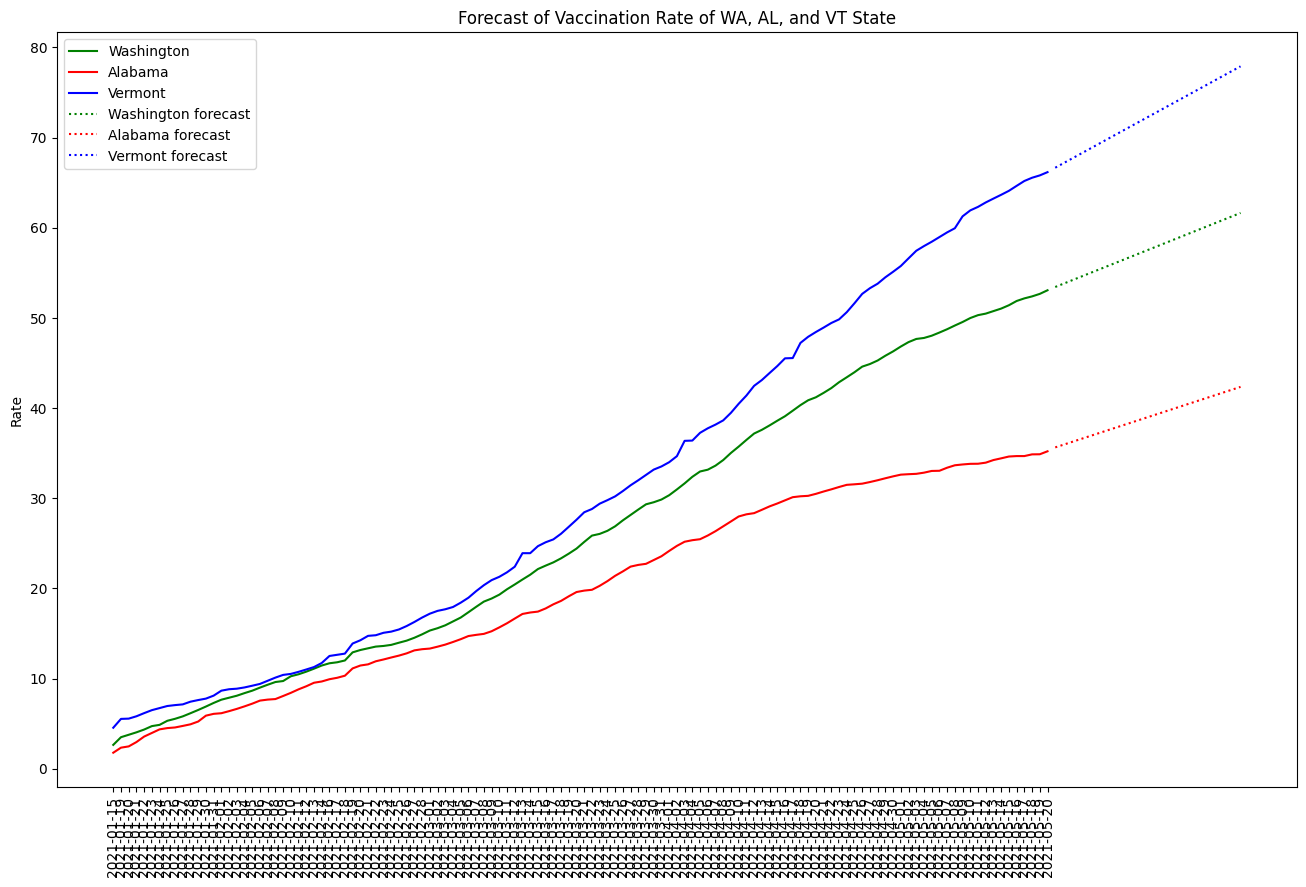

After 25 days, there will be  61.6343148340464 hundreds of people vaccinated in Washington State
After 25 days, there will be  42.3432810257457 hundreds of people vaccinated in Alabama State
After 25 days, there will be  77.89509941802385 hundreds of people vaccinated in Vermont State


In [ ]:
#Forecast
n_periods=25
fc, confint=modelWA.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc=np.arange(len(wa1["people_vaccinated_per_hundred"]),len(wa1["people_vaccinated_per_hundred"])+n_periods)
fcAL, confintAL=modelAL.predict(n_periods=n_periods, return_conf_int=True)
index_of_fcAL=np.arange(len(al["people_vaccinated_per_hundred"]),len(al["people_vaccinated_per_hundred"])+n_periods)
fcVT, confintVT=modelVT.predict(n_periods=n_periods, return_conf_int=True)
index_of_fcVT=np.arange(len(vt["people_vaccinated_per_hundred"]),len(vt["people_vaccinated_per_hundred"])+n_periods)

#make series for plotting purpose
fc_series=pd.Series(fc, index=index_of_fc)
lower_series=pd.Series( index=index_of_fc)
upper_series=pd.Series( index=index_of_fc)
fc_seriesAL=pd.Series(fcAL, index=index_of_fcAL)
lower_serieALs=pd.Series( index=index_of_fcAL)
upper_seriesAL=pd.Series(index=index_of_fcAL)
fc_seriesVT=pd.Series(fcVT, index=index_of_fcVT)
lower_seriesVT=pd.Series( index=index_of_fcVT)
upper_seriesVT=pd.Series( index=index_of_fcVT)

#Plot
plt.figure(figsize=(16,10))

plt.plot(wa1["people_vaccinated_per_hundred"], color =  "green", label = "Washington")
plt.plot(al["people_vaccinated_per_hundred"], color = "red", label = "Alabama")
plt.plot(vt["people_vaccinated_per_hundred"], color = "blue" ,label = "Vermont")
plt.plot(fc_series, linestyle = 'dotted', color='green',label = "Washington forecast")
plt.plot(fc_seriesAL,linestyle = 'dotted',label = "Alabama forecast", color = "red")
plt.plot(fc_seriesVT,linestyle = 'dotted',label = "Vermont forecast", color = "blue")
plt.ylabel('Rate')
plt.legend()
plt.title("Forecast of Vaccination Rate of WA, AL, and VT State")
plt.xticks(rotation=90)
plt.show()
x = fc_series.array
xAL =  fc_seriesAL.array
xVT = fc_seriesVT.array
print("After " + str(n_periods) + " days, there will be  " + str(x[-1]) + " hundreds of people vaccinated in Washington State")
print("After " + str(n_periods) + " days, there will be  " + str(xAL[-1]) + " hundreds of people vaccinated in Alabama State")
print("After " + str(n_periods) + " days, there will be  " + str(xVT[-1]) + " hundreds of people vaccinated in Vermont State")

In [ ]:
wa1

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-01-15,Washington,242606.0,696175.0,200682.0,0.41,3.19,31581.0,2.64,9.14,17368.0,15680.0,2059.0,0.348
2021-01-19,Washington,321200.0,696175.0,265507.0,0.59,4.22,45237.0,3.49,9.14,19648.5,17948.0,2357.0,0.461
2021-01-20,Washington,346765.0,805000.0,286500.0,0.65,4.55,49731.0,3.76,10.57,25565.0,19790.0,2599.0,0.431
2021-01-21,Washington,373423.0,820875.0,306942.0,0.73,4.90,55902.0,4.03,10.78,26658.0,21169.0,2780.0,0.455
2021-01-22,Washington,403135.0,829950.0,330357.0,0.82,5.29,62152.0,4.34,10.90,29712.0,22933.0,3012.0,0.486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,Washington,6813377.0,8316630.0,3949859.0,40.07,89.47,3051554.0,51.87,109.22,82122.0,63750.0,8372.0,0.819
2021-05-17,Washington,6871734.0,8316630.0,3972049.0,40.57,90.24,3089183.0,52.16,109.22,58357.0,59438.0,7805.0,0.826
2021-05-18,Washington,6910257.0,8380210.0,3988475.0,40.87,90.75,3112485.0,52.38,110.05,38523.0,58117.0,7632.0,0.825


**Calculating RME and MAE when using Auto ARIMA**

In [ ]:
wa1.shape

(123, 13)

In [ ]:
wa2 = wa1[["State", "people_vaccinated_per_hundred"]].copy()
wa2.dropna(inplace = True)
wa2

,State,people_vaccinated_per_hundred
date,,
2021-01-13,Washington,2.23
2021-01-15,Washington,2.64
2021-01-19,Washington,3.49
2021-01-20,Washington,3.76
2021-01-21,Washington,4.03
...,...,...
2021-05-16,Washington,51.87
2021-05-17,Washington,52.16
2021-05-18,Washington,52.38


In [ ]:
wa2 = wa2.iloc[0:100]
wa2

,State,people_vaccinated_per_hundred
date,,
2021-01-13,Washington,2.23
2021-01-15,Washington,2.64
2021-01-19,Washington,3.49
2021-01-20,Washington,3.76
2021-01-21,Washington,4.03
...,...,...
2021-04-23,Washington,42.86
2021-04-24,Washington,43.41
2021-04-25,Washington,43.97


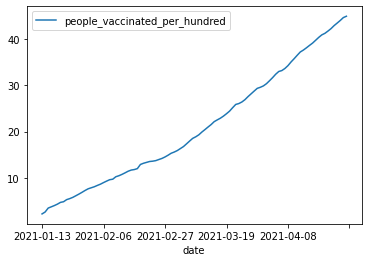

In [ ]:
wa2.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
modelWA2 = pm.auto_arima(wa2['people_vaccinated_per_hundred'], start_p =1, start_q = 1, test = 'adf', max_p = 10, max_q = 10 , d = None, seasonal = False, start_P = 0, D= 0, trace = True, error_action = 'ignore', supress_warnings = True, stepwise = True)
print(modelWA2.summary)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-75.187, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-52.204, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-73.609, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-69.077, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=132.502, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-77.105, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-71.884, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-76.672, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-75.943, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-77.972, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-70.033, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-76.072, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-68.892, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-74.005, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-75.6

**Plot graph of actual vs predicted for Washington State**

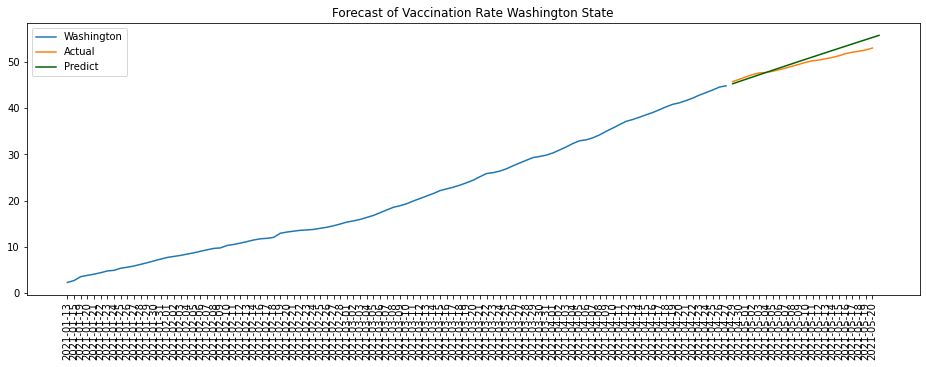

After 23 days, there will be  55.81599577964689 hundreds of people vaccinated in Washington State


In [ ]:
#Forecast
n_periods=23
fc, confint=modelWA2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc=np.arange(len(wa2["people_vaccinated_per_hundred"]),len(wa2["people_vaccinated_per_hundred"])+n_periods)

#make series for plotting purpose
fc_series=pd.Series(fc, index=index_of_fc)
lower_series=pd.Series(confint[:,0], index=index_of_fc)
upper_series=pd.Series(confint[:,1], index=index_of_fc)
#Plot
plt.figure(figsize=(16,5))
plt.plot(wa2["people_vaccinated_per_hundred"],label = "Washington")
plt.plot(actual["people_vaccinated_per_hundred"], label = "Actual")

plt.plot(fc_series, color='darkgreen', label = "Predict")
#plt.fill_between(lower_series.index,lower_series, upper_series, color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate Washington State")
plt.xticks(rotation=90)
plt.legend()
plt.show()
x =  fc_series.array
print("After " + str(n_periods) + " days, there will be  " + str(x[-1]) + " hundreds of people vaccinated in Washington State")

In [ ]:
actual = wa1[100:123]
actual

,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
date,,,,,,,,,,,,,
2021-04-28,Washington,5668118.0,7048310.0,3447001.0,31.15,74.43,2371675.0,45.27,92.56,54627.0,74034.0,9722.0,0.804
2021-04-29,Washington,5747171.0,7152780.0,3487638.0,31.65,75.47,2409840.0,45.80,93.93,79053.0,74713.0,9811.0,0.803
2021-04-30,Washington,5828363.0,7203050.0,3524503.0,32.24,76.54,2454705.0,46.28,94.59,81192.0,73135.0,9604.0,0.809
2021-05-01,Washington,5907522.0,7368520.0,3565288.0,32.74,77.58,2493486.0,46.82,96.76,79159.0,72914.0,9575.0,0.802
2021-05-02,Washington,5983715.0,7368520.0,3602356.0,33.28,78.58,2534143.0,47.31,96.76,76193.0,71088.0,9335.0,0.812
2021-05-03,Washington,6041337.0,7368520.0,3629546.0,33.69,79.34,2565503.0,47.66,96.76,57622.0,66756.0,8767.0,0.820
2021-05-04,Washington,6056250.0,7597610.0,3637897.0,33.79,79.53,2573072.0,47.77,99.77,14913.0,63251.0,8306.0,0.797
2021-05-05,Washington,6099153.0,7647410.0,3656965.0,34.11,80.10,2597762.0,48.02,100.43,42903.0,61576.0,8086.0,0.798
2021-05-06,Washington,6162034.0,7680690.0,3683465.0,34.61,80.92,2635610.0,48.37,100.86,62881.0,59266.0,7783.0,0.802


In [ ]:
fc_seriesArray= fc_series.array
fc_seriesArray

<PandasArray>
[45.315317610097985, 45.808229729296045,  46.29933506157633,
  46.78868885916964, 47.276344684672566,  47.76235446271713,
  48.24676853006035, 48.729635684142096,  49.21100323015798,
  49.69091702669273, 50.169421529958136,  50.64655983667812,
  51.12237372566241,  51.59690369810886,  52.07018901667327,
  52.54226774334452, 53.013176776161394,  53.48295188480663,
  53.95162774511246,  54.41923797251099,  54.88581515446163,
   55.3513908818869,  55.81599577964689]
Length: 23, dtype: float64

In [ ]:
actual = actual["people_vaccinated_per_hundred"].copy()
actual

date
2021-04-28    45.27
2021-04-29    45.80
2021-04-30    46.28
2021-05-01    46.82
2021-05-02    47.31
2021-05-03    47.66
2021-05-04    47.77
2021-05-05    48.02
2021-05-06    48.37
2021-05-07    48.74
2021-05-08    49.15
2021-05-09    49.54
2021-05-10    49.98
2021-05-11    50.30
2021-05-12    50.47
2021-05-13    50.75
2021-05-14    51.03
2021-05-15    51.40
2021-05-16    51.87
2021-05-17    52.16
2021-05-18    52.38
2021-05-19    52.66
2021-05-20    53.06
Name: people_vaccinated_per_hundred, dtype: float64

In [ ]:
actual.array

<PandasArray>
[45.27,  45.8, 46.28, 46.82, 47.31, 47.66, 47.77, 48.02, 48.37, 48.74, 49.15,
 49.54, 49.98,  50.3, 50.47, 50.75, 51.03,  51.4, 51.87, 52.16, 52.38, 52.66,
 53.06]
Length: 23, dtype: float64

**Calcuating Root mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(actual.array, fc_seriesArray, squared = False)
rms

1.5066262628429126

**Calculating Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(actual.array, fc_seriesArray)

1.1972365015613333

1.5066262628429126

In [ ]:
washington = data[data['State Code'] == "Wa"]
washington

SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



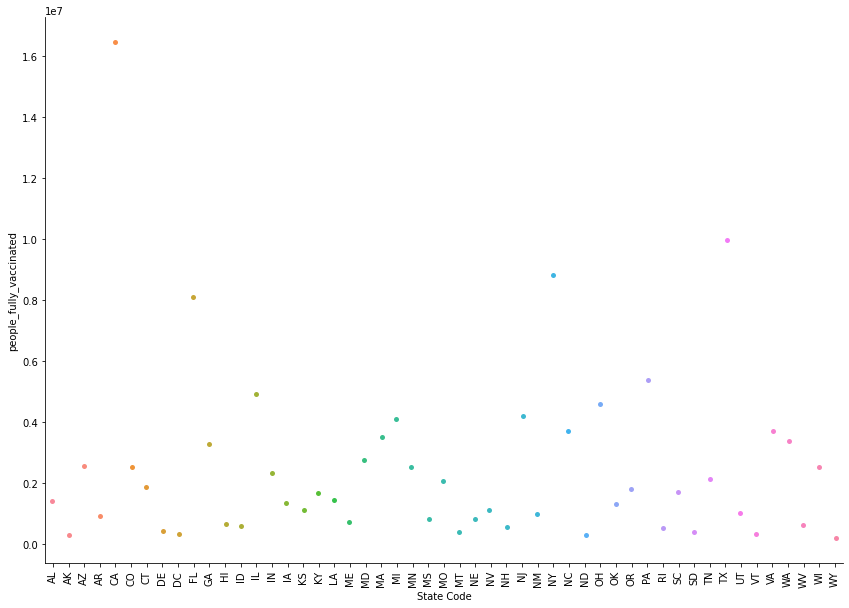

In [ ]:
label = sns.catplot('State Code', data = data_vaccinated, y = data_vaccinated['people_fully_vaccinated'], height=8.27, aspect=11.7/8.27)
label.set_xticklabels(rotation=90)